In [14]:
# Load data and necessary packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.neural_network import MLPClassifier

# Movies are Like a Box of Chocolates

In this exercise, I want to see what, if any, characteristics make for a successful movie. Of course, the term success can be subjective. For this study, we will arbitrarily consider any movie that makes at least enough money to recoup the cost of making the movie a success.

In [3]:
# import data
df = pd.read_csv('../../../Data/movie_metadata.csv')
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [4]:
# shape of df
df.shape

(5043, 28)

In [7]:
# drop null values
df = df.dropna()

In [8]:
# new shape
df.shape

(3756, 28)

In [9]:
# columns
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [18]:
# let's add a column for net profit
df['net_profit'] = df['gross'] - df['budget']

In [20]:
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      ...      language country  content_rating       budget title_year  \
0     ...       English     USA           PG-13  237000000.0     2009.0   
1     ...       English     USA           PG-13  300000000.0     2007.0   
2     ...       English      UK           PG-13  245000000.0     2015.0   
3     ...       English     USA           PG-13  250000000.0     2012.0   
5     ...       English     USA           PG-13  263700000.0     2012.0   

   actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                   936.0        7.9         1.78                 33000   
1                  5000.0        7.1         2.35                     0   
2                   393.0        6.8         2.35                 85000   
3                 23000.0        8.5         2.35                164000   
5                   632.0        6.6         2.35                 24000   

    net_profit  
0  523505847.0  
1    9404152.0  
2  -44925825.0  
3  198130642.0  
5 -190641321.0  

[5 rows x 29 columns]

In [21]:
pandas_profiling.ProfileReport(df)

In [43]:
# aggregating net_profits by director
directors = df.groupby(['director_name'], as_index=False)['gross', 'budget', 'net_profit'].sum()

# changing display options to standardize format for ease of reading
pd.set_option('display.float_format', lambda x: '%0.0f' % x)
print(directors)

                   director_name      gross    budget  net_profit
0                Aaron Schneider    9176553   7500000     1676553
1                  Aaron Seltzer   48546578  20000000    28546578
2                   Abel Ferrara    1227324  12500000   -11272676
3                  Adam Goldberg       2580   1650000    -1647420
4                    Adam Marcus   15935068   2500000    13435068
5                     Adam McKay  524449691 342000000   182449691
6                      Adam Rapp     101228   3500000    -3398772
7                    Adam Rifkin    4193025  15000000   -10806975
8                  Adam Shankman  697071855 425000000   272071855
9                    Adrian Lyne  311033012  85000000   226033012
10               Adrienne Shelly   19067631   2000000    17067631
11             Agnieszka Holland     352786  11000000   -10647214
12    Agnieszka Wojtowicz-Vosloo     108229   4500000    -4391771
13                Aki Kaurismäki     611709   3850000    -3238291
14        

In [44]:
# create new dataframe for ease of use when plotting
df_directors = pd.DataFrame(directors)
df_directors.shape

(1659, 4)

In [46]:
# That's a lot of directors. Let's see the top 10.
df_directors.sort_values(by='net_profit', ascending=False).head(10)

director_name      gross     budget  net_profit
1492   Steven Spielberg 4114233101 1627900870  2486332231
518        George Lucas 1741418480  354777000  1386641480
620       James Cameron 1948125910  748500000  1199625910
839         Joss Whedon 1730886628  730000000  1000886628
222      Chris Columbus 1618707624  677000000   941707624
1536         Tim Burton 2071275480 1247000000   824275480
251   Christopher Nolan 1813227576 1005000000   808227576
1229      Peter Jackson 2289968050 1512000000   777968050
790         Jon Favreau 1562381547  793000000   769381547
463    Francis Lawrence 1358501971  603000000   755501971

Well that was to be expected - lots of recognizable names. Now let's see the bottom 10 just to see if there are any recognizable names there.

In [49]:
df_directors.sort_values(by='net_profit', ascending=True).head(10)

director_name     gross      budget   net_profit
817          Joon-ho Bong   6764441 12254700000 -12247935559
207        Chan-wook Park   4095234  4215000000  -4210904766
865       Katsuhiro Ôtomo    849550  3227519898  -3226670348
909          Lajos Koltai    195888  2500000000  -2499804112
573        Hayao Miyazaki  32140315  2477000000  -2444859685
1511        Takao Okawara  10037390  1000000000   -989962610
856           Karan Johar   7294138   712000000   -704705862
197          Carlos Saura   1687311   700000000   -698312689
785              John Woo 493401036   983632000   -490230964
217   Chatrichalerm Yukol    454255   400000000   -399545745

Hmmmm... very suspicious. Chan-wook Park is a very successful Korean director and it doesn't seem possible to me that his budget would be that astronomical. I want to take a closer look at his movies.

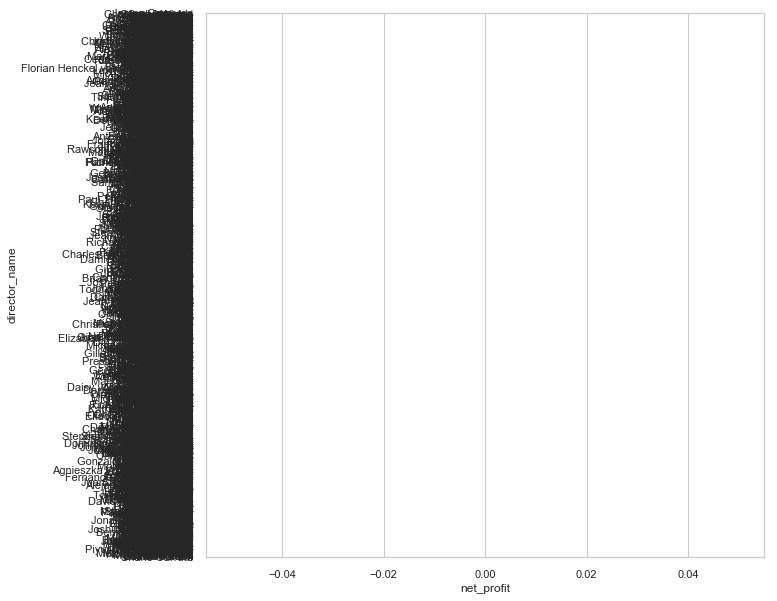

In [25]:
# Let's see some interesting plots
f, ax = plt.subplots(figsize=(10,10))
sns.set(style='whitegrid')

x = df.groupby(['director_name'])['net_profit'].sum()
y = df['director_name']
data = df

sns.barplot(x=x, y=y, data=data)
plt.show()